In [1]:
# !pip3 install scikit-learn tensorflow matplotlib seaborn numpy
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

path = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

data = pd.read_csv(path, header=None)


In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [5]:

features = data.drop(140, axis=1)
target = data[140]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2
)

train_index = y_train[y_train == 1].index

train_data = x_train.loc[train_index]

In [6]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = min_max_scaler.fit_transform(train_data.copy())

x_test_scaled = min_max_scaler.transform(x_test.copy())


In [7]:
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(ldim, activation='relu')
        ])
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_units, activation='sigmoid')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded


In [8]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])

model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(x_train_scaled, x_train_scaled, epochs=20, batch_size=512, validation_data=(x_test_scaled, x_test_scaled), shuffle=True)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0118 - mse: 0.0270 - val_loss: 0.0141 - val_mse: 0.0334
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0115 - mse: 0.0264 - val_loss: 0.0138 - val_mse: 0.0328
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0111 - mse: 0.0255 - val_loss: 0.0134 - val_mse: 0.0318
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101 - mse: 0.0230 - val_loss: 0.0130 - val_mse: 0.0308
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0087 - mse: 0.0197 - val_loss: 0.0132 - val_mse: 0.0310
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0076 - mse: 0.0170 - val_loss: 0.0127 - val_mse: 0.0298
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - mse: 0.0143 - val_loss: 0.0122 - val_mse: 0.0285
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054 - mse: 0.0122 - val_loss: 0.0120 - val_mse: 0.0282
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - mse: 0.0112 -

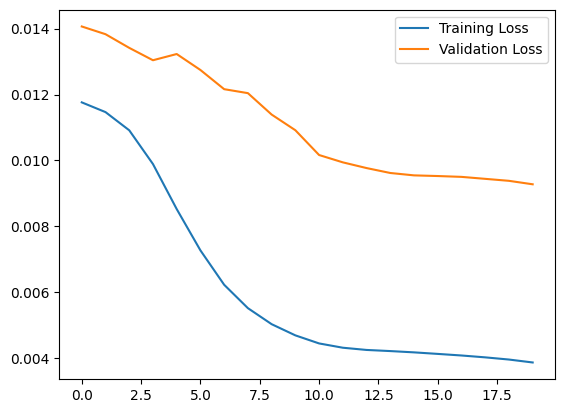

In [9]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [10]:
def find_threshold(model, x_train_scaled):
    recons = model.predict(x_train_scaled)
    recons_error = tf.keras.metrics.msle(recons, x_train_scaled)
    threshold = np.mean(recons_error.numpy()) + np.std(recons_error.numpy())
    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Threshold: 0.008966676737720405


In [11]:
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy = accuracy_score(predictions, y_test)

print(f"Accuracy Score: {accuracy}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy Score: 0.953
